# Trabajo Práctico 3

Integrantes:
* Bayardo Spadafora, Julián. LU: 850/13. Email: julian@bayardo.info
* Cuneo, Christian. LU: 755/13. Email: chriscuneo93@gmail.com

Fecha de Entrega: 09/08/2017

# Ejercicio 1

Para resolver este ejercicio, utilizamos la solución obtenida por Cuadrados Mínimos del vector de pesos para el discriminante de Fisher[1]. En la siguiente formulación, tomamos a $N$ como la cantidad de muestras, $N_1$ como la cantidad de muestras de clase $C_1$ y $N_2$ como la cantidad de muestras de clase $C_2$.

Bishop comenta que si reemplazamos a los targets $t_i$ por $\frac{N}{N_1}$ en el caso de $C_1$ y $\frac{-N}{N_2}$ en el caso de $C_2$, podemos reformular la solución al problema del discriminante de Fisher como la minimización del error cuadrático medio:

$$E(w) = \frac{1}{2}\sum_{n=1}^N (w^T x_n + w_0 - t_n)^2$$

Y al obtener las derivadas con respecto a $w_0$ y $w$ e igualar a $0$, obtenemos:

$$w_0 = -w^T m$$

Donde $m = \frac{1}{N} \sum_{n=1}^N x_n$ es el promedio de todo el conjunto de datos, y además:

$$(S_W + \frac{N_1 N_2}{N} S_B) w = N (m_1 - m_2)$$

Donde $S_W$ es la matriz de covarianza dentro de las clases, $S_B$ es la matriz de covarianca intra clase, y los $m_i$ son los promedios de cada una de las clases. De esto se sigue que:

$$S_W w + \frac{N_1 N_2}{N} S_B w = N (m_1 - m_2)$$

Pero $S_B w$ es paralelo a $(m_1 - m_2)$, por lo que tenemos que

$$S_W w = \alpha (m_1 - m_2)$$

O, equivalentemente

$$w = \alpha S_W^{-1} (m_1 - m_2)$$

Donde $\alpha$ contiene a la constante dada por el hecho de ser paralelos multiplicada por las otras constantes en la ecuación. Cabe destacar que basta con tomar $S_W^{-1} (m_1 - m_2)$ como $w^*$,  ya que $J$

[1] Christopher M. Bishop, "Pattern Recognition and Machine Learning", Springer, 2006. Sección 4.1.5, Página 190.

In [241]:
import scipy as sp
import scipy.stats
import numpy as np
import numpy.random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

def fisher_2class(X, Y):
    # X looks like a matrix
    assert len(X.shape) == 2
    # X has at one row
    assert X.shape[0] > 0
    # X has at least two features
    assert X.shape[1] >= 2

    # Y is an array
    assert len(Y.shape) == 1
    # Y has exactly one element per entry in the dataset
    assert Y.shape[0] == X.shape[0]
    
    # Fetch unique classes
    classes = np.unique(Y)
    # We have exactly two classes
    assert len(classes) == 2
    
    means = np.zeros(shape=(len(classes), X.shape[1]))
    Sw = np.zeros(shape=(X.shape[1], X.shape[1]))
    # Process each class separately
    for index, c in enumerate(classes):
        # Indexes that have class `c`
        discriminator = np.where(Y==c)
        # Compute the mean for the class
        means[index] = np.mean(X[discriminator], axis=0)
        # Add up the local within-class covariance to the total within-class covariance matrix
        Sw += np.cov(np.transpose(X[discriminator] - means[index]))
    
    # Compute `w` as seen in the above cell
    w = np.matmul(np.linalg.inv(Sw), means[1] - means[0])
    # The weight vector has exactly one weight per feature
    assert w.shape[0] == X.shape[1]
    mean = np.mean(X, axis=0)
    w0 = -np.matmul(w, mean)
    # TODO: return class mapping.
    return w, w0

# Ejercicio 2

Para esta implementación, seguimos la metodología de Fukunaga[1] citada en el libro de Bishop; pero siguiendo las explicaciones más amenas dadas en [2] y [3].

[1] Fukunaga, K. "Introduction to Statistical Pattern Recognition" (Segunda ed.). Academic Press, 1990.
[2] http://www.ics.uci.edu/%7Ewelling/classnotes/papers_class/Fisher-LDA.pdf
[3] http://research.cs.tamu.edu/prism/lectures/pr/pr_l10.pdf

In [ ]:
C = np.cov(np.transpose(data))
# Loop over classes
classes = np.unique(labels)
for i in range(len(classes)):
    # Find relevant datapoints
    indices = np.squeeze(np.where(labels==classes[i]))
    d = np.squeeze(data[indices,:])
    classcov = np.cov(np.transpose(d))
    Sw += np.float(np.shape(indices)[0])/nData * classcov
Sb = C - Sw
# Now solve for W and compute mapped data
# Compute eigenvalues, eigenvectors and sort into order
evals,evecs = la.eig(Sw,Sb)
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]
w = evecs[:,:redDim]
newData = np.dot(data,w)

# Ejercicio 3

Como vimos en la clase teórica, si los datos provienen de una Gaussiana multivariada isotrópica, entonces el vector $w$ poseerá la dirección que une a los centros de las clases.

In [242]:
# These are configuration parameters
DATASET_SIZE = 1000
TRAIN_RELATIVE_SIZE = 0.1
INPUT_DIMENSIONS = 2
DIMENSION_RANGES = np.array([[-10.0, -10.0], [10.0, 10.0]])
DIMENSION_PLOT_RANGE_PRECISION = 0.55
LABEL_COLORS=['blue', 'red']
assert DATASET_SIZE >= 1
assert INPUT_DIMENSIONS >= 2
assert DIMENSION_RANGES.shape == (2, INPUT_DIMENSIONS)
assert 0.0 < TRAIN_RELATIVE_SIZE <= 1.0

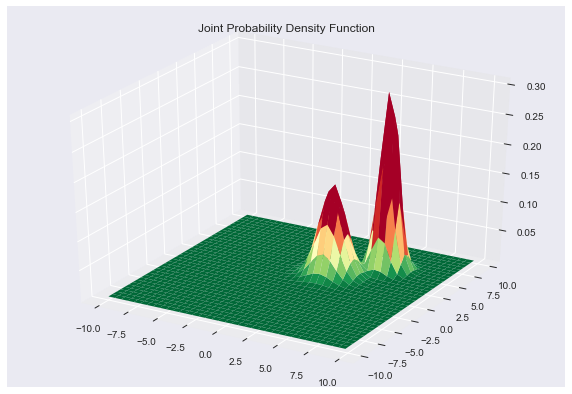

In [243]:
# Set the distributions we are going to use for our examples
mean_1 = [2.0, 2.0]
cov_1 = [[1, 0.0], [0.0, 1]]
gd1 = sp.stats.multivariate_normal(mean=mean_1, cov=cov_1)

mean_2 = [5.0, 5.0]
cov_2 = [[.5, 0.0], [0.0, .5]]
gd2 = sp.stats.multivariate_normal(mean=mean_2, cov=cov_2)

DISTRIBUTIONS = [gd1, gd2]
assert all([d.dim == INPUT_DIMENSIONS for d in DISTRIBUTIONS])
assert len(DISTRIBUTIONS) <= len(LABEL_COLORS)

if INPUT_DIMENSIONS == 2:
    x = np.arange(DIMENSION_RANGES[0][0], DIMENSION_RANGES[1][0], DIMENSION_PLOT_RANGE_PRECISION)
    y = np.arange(DIMENSION_RANGES[0][1], DIMENSION_RANGES[1][1], DIMENSION_PLOT_RANGE_PRECISION)
    X, Y = np.meshgrid(x, y)
    zs = np.array([max(gd1.pdf([x,y]), gd2.pdf([x,y])) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    # Graph the surface
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    plt.title('Joint Probability Density Function')

    ax.plot_surface(X, Y, Z, color='b', vmin=0, vmax=0.1, cmap='RdYlGn_r')

In [244]:
# Sample from the process that generates the dataset
X = []
Y = []
for _ in range(DATASET_SIZE):
    # Fetch one of our chosen distributions, this will be the label
    y = np.random.randint(len(DISTRIBUTIONS))
    # Generate a random point sampled from it
    x = DISTRIBUTIONS[y].rvs(size=1)
    Y.append(y)
    X.append(x)
    
# Convert into numpy format, this is what we are going to use for training
X = np.array(X)
Y = np.array(Y)
selection_mask = np.random.rand(DATASET_SIZE) < TRAIN_RELATIVE_SIZE

# Train the classifier
w, w0 = fisher_2class(X[selection_mask], Y[selection_mask])

# Run all the data through the classifier
predictions = np.zeros(shape=(DATASET_SIZE, 3))
for index, (x, y) in enumerate(zip(X, Y)):
    predicted = np.matmul(w, x) + w0
    if predicted < 0:
        predictions[index] = (predicted, 0, y)
    else:
        predictions[index] = (predicted, 1, y)

In [245]:
df = pd.concat([
        pd.DataFrame(X,
                     columns=['x' + str(i) for i in range(INPUT_DIMENSIONS)]),
        pd.DataFrame(predictions,
                     columns=['prediction',
                              'predicted_label',
                              'label']),
        pd.DataFrame(selection_mask,
                     columns=['is_training_data'])],
    axis=1)

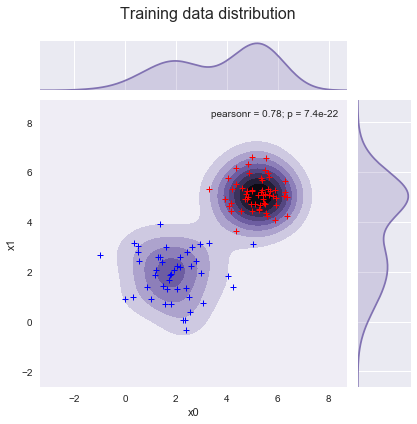

In [246]:
# Plot the input dataset and labelled samples
if INPUT_DIMENSIONS == 2:
    plot_df = df[df['is_training_data'] == True]
    plot = sns.jointplot(x="x0", y="x1", data=plot_df, kind='kde',
                         color='m')
    plot.fig.subplots_adjust(top=0.9)
    plot.fig.suptitle('Training data distribution', fontsize=16)
    labels = np.unique(Y)
    for index, label in enumerate(labels):
        intermediate = plot_df[plot_df['label'] == label]
        plot.ax_joint.scatter(intermediate['x0'], intermediate['x1'],
                              s=30, linewidth=1, marker='+',
                              color=LABEL_COLORS[index])

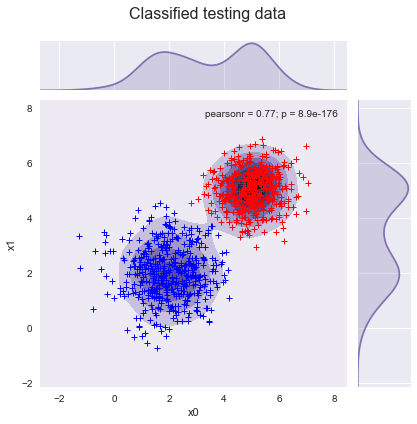

In [247]:
# Plot the testing data and classification
if INPUT_DIMENSIONS == 2:
    plot_df = df[df['is_training_data'] == False]
    plot = sns.jointplot(x="x0", y="x1", data=plot_df, kind='kde',
                         color='m')
    plot.fig.subplots_adjust(top=0.9)
    plot.fig.suptitle('Classified testing data', fontsize=16)
    labels = np.unique(Y)
    for index, label in enumerate(labels):
        intermediate = plot_df[plot_df['predicted_label'] == label]
        plot.ax_joint.scatter(intermediate['x0'], intermediate['x1'],
                              s=30, linewidth=1, marker='+',
                              color=LABEL_COLORS[index])

# Ejercicio 4